# CartPole by Zhiqing Xiao

[GitHub repository](https://github.com/ZhiqingXiao/OpenAIGymSolution/tree/master/CartPole-v0)

Dr. Zhiqing Xiao resolved the cart pole problem by applying a fixed deterministic policy, as follows:


```
if (3 * angle + angle_velocity) > 0:
  push_right()
otherwise:
  push left()
```

In [1]:
import itertools
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
env = gym.make("CartPole-v1", render_mode='rgb_array')

In [3]:
class Agent:
    def decide(self, observation):
        position, velocity, angle, angle_velocity = observation
        action = int(3. * angle + angle_velocity > 0.)
        return action

agent = Agent()

In [4]:
def play_once(env, agent, verbose=False):
    observation, _ = env.reset()
    episode_reward = 0.
    for step in itertools.count():
        action = agent.decide(observation)
        #print(step, env.step(action))
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        if terminated or truncated:
            break
    if verbose:
        print('get {} rewards in {} steps'.format(
                episode_reward, step + 1))
    return episode_reward

In [5]:
episodes = 100

In [6]:
episode_rewards = list()
for episode in range(episodes):
    episode_reward = play_once(env, agent, verbose=False)
    #print('Episode %s reward is %s' % (episode, episode_reward))
    episode_rewards.append(episode_reward)
print('average episode rewards = {}'.format(np.mean(episode_rewards)))

average episode rewards = 500.0


In [7]:
env.close()

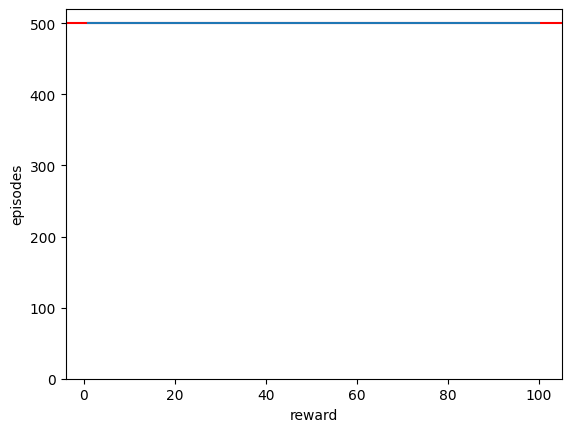

In [25]:
episode_series = range(1, episodes+1)
plt.axhline(y = env.spec.max_episode_steps, color = 'r', linestyle = '-')
plt.plot(episode_series, episode_rewards)
plt.ylim([0, env.spec.max_episode_steps+20])
plt.xlabel('reward')
plt.ylabel('episodes')
plt.show()